In [1]:
import requests
from bs4 import BeautifulSoup

import time
import re
import pandas as pd
import numpy as np

from nltk.tokenize import word_tokenize
from nltk import download
download('punkt')

from collections import Counter
download('stopwords')
from nltk.corpus import stopwords

import matplotlib.pyplot as plt 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\olmal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olmal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
!pip install pymorphy2
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

In [3]:
for i in range(50):
    paintings_wp = requests.get('https://opisanie-kartin.ru')
    time.sleep(0.2)
paintings_soup = BeautifulSoup(paintings_wp.text)

In [5]:
url_list = ['ajvazovskij-ivan']
for link in paintings_soup.find_all('a'):
    url = link['href'][:-1]
    if 'opisanie-kartin.ru/category/a' in url:
        url_list.append(url[36:])
    elif 'category' in url and 'https' not in url:
        url_list.append(url[35:])
url_set = set(url_list[1:])
url_set

{'',
 'ajvazovskij-ivan',
 'alekseev-fedor',
 'altdorfer-albreht',
 'archimboldo-dzhuzeppe',
 'argunov-ivan',
 'arhipov-abram',
 'bakst-leon',
 'baskiya-zhan-mishel',
 'benua-aleksandr',
 'bilibin-ivan',
 'bleik-uilyam',
 'bogdanov-belskij-nikolaj',
 'borisov-musatov-viktor',
 'borovikovskij-vladimir',
 'bosh-ieronim',
 'brak-zhorzh',
 'breigel-piter',
 'brodskij-isaak',
 'bryullov-karl',
 'bugro-vilyam',
 'buonarroti-mikelandzhelo',
 'burlyuk-david',
 'bushe-fransua',
 'chyurlyonis-mikaloyus',
 'david-zhak-lui',
 'dega-edgar',
 'delakrua-ezhen',
 'dobuzhinskij-mstislav',
 'durer-albreht',
 'dzhordzhone',
 'engr-dominik',
 'esher-mauric',
 'fedotov-pavel',
 'flavickij-konstantin',
 'ge-nikolaj',
 'geren-pyer',
 'gogen-pol',
 'golbein-gans',
 'goya-francisko',
 'grabar-igor',
 'grigoryev-sergey',
 'hopper-edvard',
 'ivanov-aleksandr',
 'kalo-frida',
 'kandinskij-vasilij',
 'karavadzho',
 'kiprenskij-orest',
 'klimt-gustav',
 'klod-mone',
 'konchalovskij-petr',
 'konstantin-vasilyev',
 '

In [7]:
from os import listdir
from os import path 

!mkdir all_html

Џ®¤Ї ЇЄ  Ё«Ё д ©« all_html г¦Ґ бгйҐбвўгҐв.


In [10]:
folder_name = 'all_html'
url_list_paint = []
for i in url_set:
    page_response = requests.get(f'https://opisanie-kartin.ru/category/{i}')
    time.sleep(0.3)
    page_text = page_response.text
    soup = BeautifulSoup(page_text)
    for element in soup.find_all(class_="js-masonry"):
        for link in element.find_all('a'):
            url = link['href'][:-1]
            if 'https://' in url:
                url_list_paint.append(url[27:])
url_set_paint = set(url_list_paint)
url_set_paint

{'ajvazovskij-ivan/avtoportret-2',
 'ajvazovskij-ivan/birzha-peterburga',
 'ajvazovskij-ivan/bolshoj-reid-v-kronshtadte',
 'ajvazovskij-ivan/bosfor-v-lunnuyu-noch',
 'ajvazovskij-ivan/brig-merkurij-atakovannyj-dvumya-tureckimi-korablyami',
 'ajvazovskij-ivan/burya',
 'ajvazovskij-ivan/burya-na-more-nochyu',
 'ajvazovskij-ivan/chernoe-more',
 'ajvazovskij-ivan/chesmenskaya-bitva',
 'ajvazovskij-ivan/chesmenskaya-bitva-nochyu',
 'ajvazovskij-ivan/desant-v-subashi',
 'ajvazovskij-ivan/devyatyj-val',
 'ajvazovskij-ivan/georgievskij-monastyr',
 'ajvazovskij-ivan/lunnaya-noch-na-bosfore',
 'ajvazovskij-ivan/more-koktebel',
 'ajvazovskij-ivan/neapolitanskij-zaliv-utrom',
 'ajvazovskij-ivan/neapolitanskij-zaliv-v-lunnom-svete',
 'ajvazovskij-ivan/odessa-nochyu',
 'ajvazovskij-ivan/petr-1-pri-krasnoj-gorke',
 'ajvazovskij-ivan/portret-loris-melikova',
 'ajvazovskij-ivan/prosshanie-pushkina-s-chernym-morem',
 'ajvazovskij-ivan/pushkin-na-beregu-chernogo-morya',
 'ajvazovskij-ivan/raduga',
 'ajva

In [11]:
for i in url_set_paint:
    page_response = requests.get(f'https://opisanie-kartin.ru/{i}')
    page_text = page_response.text
    if '/' in i:
        i = i.replace('/','_')
    with open (f'all_html/local_copy_of_page_{i}.html', 'w', encoding='utf-8') as localfile:
        localfile.write(page_text)

In [12]:
list_of_texts = []
yet_another_list = []
new_df = pd.DataFrame(columns=['Style','Text'])
for filename in listdir(folder_name):
    path_to_file = path.join(folder_name, filename)    
    with open(path_to_file, encoding='utf-8') as local_html:
            html_text = local_html.read()
            soup = BeautifulSoup(html_text)
            text_str = ''
            style_str = ''
            for element in soup.find_all(class_="entry-content"): 
                for item in element.find_all('p'):
                        if 'Стиль:' in item.text:
                            match = r'Стиль:.*$'
                            check = re.search(match, item.text)
                            if check:
                                style_str = item.text[7:][:-1].lower()
                                style_str = re.sub(r'\xa0', r' ', style_str)
                                yet_another_list.append(style_str.strip(' \n'))
                            else:
                                style_str = re.sub(r'Год(.*\n){5}.*(Стиль:(.+)\.\n).*$', r'\g<3>', item.text)
                                style_str = re.sub(r'\xa0', r' ', style_str)
                                yet_another_list.append(style_str.strip(' \n').lower())
                        elif len(item.text)>= 170 and 'the' not in item.text:
                            text_str = text_str + item.text
            if  not style_str:
                print(f'{filename} has no style :(')
                yet_another_list.append('No style')
            if text_str:
                list_of_texts.append(text_str) 
            else:
                list_of_texts.append('No text') 

new_df['Style'] = yet_another_list
new_df['Text'] = list_of_texts
new_df

local_copy_of_page_ivanov-aleksandr_iosif-tolkuyusshij-sny-zaklyuchennym-s-nim-v-temnice-vinocherpiyu-i-hlebodaru.html has no style :(
local_copy_of_page_serov-valentin_portret-oliv.html has no style :(
local_copy_of_page_yablonskaya-tatyana_vesna-6.html has no style :(


,Style,Text
0,романтизм,No text
1,романтизм,No text
2,романтизм,«Большой рейд в Кронштадте» — одна из самых ра...
3,романтизм,Все творчество и вся жизнь Ивана Айвазовского ...
4,романтизм,No text
...,...,...
915,импрессионизм,Есть в этой пастельной серии какой-то удивител...
916,романтизм,No text
917,романтизм,No text
918,романтизм,No text


In [84]:
def preprocess_text(text, x):
    all_tokens = []
    stop_words = stopwords.words('russian') + ['это', 'какой-то', 'этот', 'который', 'на', 'в', 'но', \
                                               'из-за','год', 'что-то', 'л', 'м', 'какой-нибудь', 'ii', 'гога']
    text = text.replace('.',' ')
    text = text.replace('…',' ')
    all_tokens = word_tokenize(text.lower())
    all_clean = [item for item in all_tokens if item[0].isalpha()]
    if x == 'process':
        all_clean2 = [item for item in all_clean if item not in stop_words]
        all_lemmatized = [morph.parse(item)[0].normal_form for item in all_clean2]
        all_clean3 = [item for item in all_lemmatized if item not in stop_words]
        all_final = [str(i) for i in all_clean3]
        return ' '.join(all_final)
    elif x == 'count':
        return len(all_clean)

In [85]:
def final_countdown(text):
    keywords_freq = []
    all_tokenized = word_tokenize(text)
    keywords_freq = Counter(all_tokenized).most_common(15)
    return keywords_freq

In [87]:
index_list = new_df[(new_df['Text']!= 'No text') & (new_df['Style']!= 'No style')].index.array
df = new_df[(new_df['Text']!= 'No text') & (new_df['Style']!= 'No style')]

for i in index_list:
    key_words = preprocess_text(new_df.iloc[i][1], 'process')
    df.loc[i, 'Keywords'] = key_words
df

C:\Users\olmal\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\olmal\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Style,Text,Keywords
2,романтизм,«Большой рейд в Кронштадте» — одна из самых ра...,большой рейд кронштадт самый ранний работа ава...
3,романтизм,Все творчество и вся жизнь Ивана Айвазовского ...,творчество весь жизнь иван айвазовский связать...
5,романтизм,Айвазовский писал море в любое время суток. Из...,айвазовский писать море любой время сутки изум...
7,романтизм,"Глядя на морской пейзаж, изображенный на карти...",глядеть морской пейзаж изобразить картина иван...
8,романтизм,Чесменское сражение — одна из славный и героич...,чесменский сражение славный героический страни...
...,...,...,...
907,соцреализм,Т.Н.Яблонская является ярким представителем бы...,н яблонской являться яркий представитель бытов...
910,социалистический реализм,Замечательная советская художница Татьяна Ябло...,замечательный советский художница татьяна ябло...
913,"сюрреализм, символизм","В 1969 году в городке Седнев, на пленэре, Ябло...",городок седнев пленэр яблонской скорее удаться...
914,социалистический реализм,Сейчас трудно вообразить хотя бы несколько при...,трудно вообразить хотя несколько причина карти...


In [89]:
df['Style'].loc[df['Style'].str.contains(r'социалистический реализм')] = 'соцреализм'
df

,Style,Text,Keywords
2,романтизм,«Большой рейд в Кронштадте» — одна из самых ра...,большой рейд кронштадт самый ранний работа ава...
3,романтизм,Все творчество и вся жизнь Ивана Айвазовского ...,творчество весь жизнь иван айвазовский связать...
5,романтизм,Айвазовский писал море в любое время суток. Из...,айвазовский писать море любой время сутки изум...
7,романтизм,"Глядя на морской пейзаж, изображенный на карти...",глядеть морской пейзаж изобразить картина иван...
8,романтизм,Чесменское сражение — одна из славный и героич...,чесменский сражение славный героический страни...
...,...,...,...
907,соцреализм,Т.Н.Яблонская является ярким представителем бы...,н яблонской являться яркий представитель бытов...
910,соцреализм,Замечательная советская художница Татьяна Ябло...,замечательный советский художница татьяна ябло...
913,"сюрреализм, символизм","В 1969 году в городке Седнев, на пленэре, Ябло...",городок седнев пленэр яблонской скорее удаться...
914,соцреализм,Сейчас трудно вообразить хотя бы несколько при...,трудно вообразить хотя несколько причина карти...


In [91]:
df2 = df.groupby(['Style'])['Keywords'].sum()
df2 = df2.to_frame().reset_index()
df2

,Style,Keywords
0,абстракционизм,многие ценитель живопись сходиться картина вас...
1,академизм,приам испрашивать ахиллес тело гектор первый б...
2,аналитический кубизм,жорж брак родиться пригород париж прославить и...
3,барокко,свет тень иметь очень большой значение работа ...
4,высокое возрождение,безжизненный тело адам неподвижно медленно при...
5,импрессионизм,картина абрам архипов девушка кувшин написать ...
6,классицизм,больший известность иван аргунов крепостной ху...
7,клуазонизм,картина поле гоген купальщица входить список с...
8,кубизм,разрыв казимир малевич импрессионизм работа об...
9,"кубизм, постимпрессионизм",пётр кончаловский право считаться сильный маст...


абстракционизм


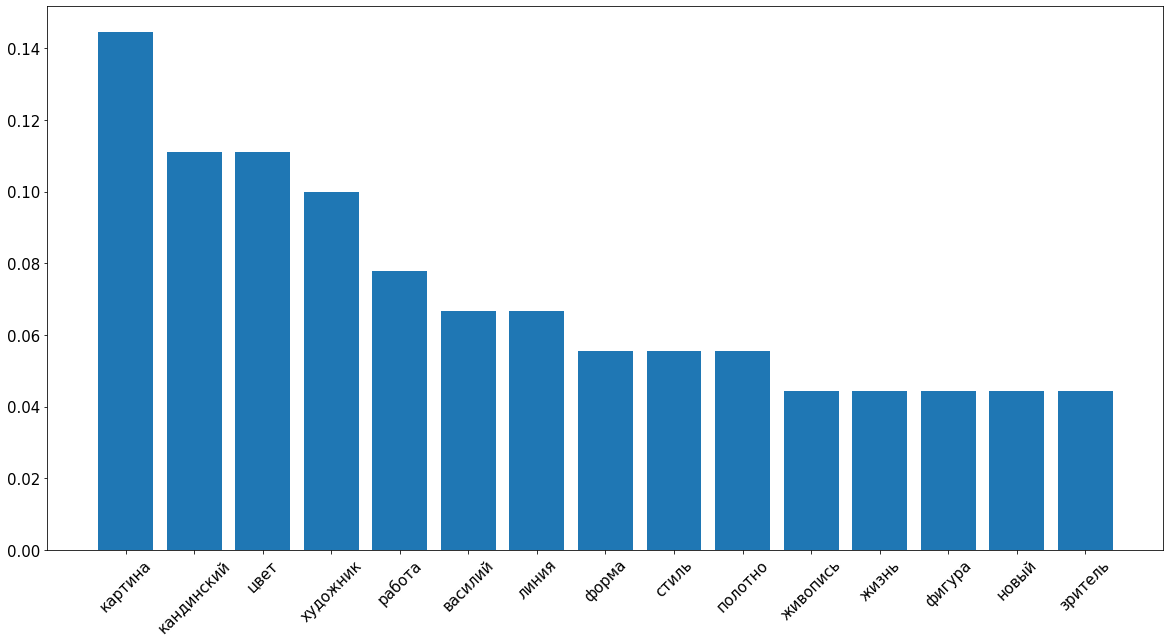

академизм


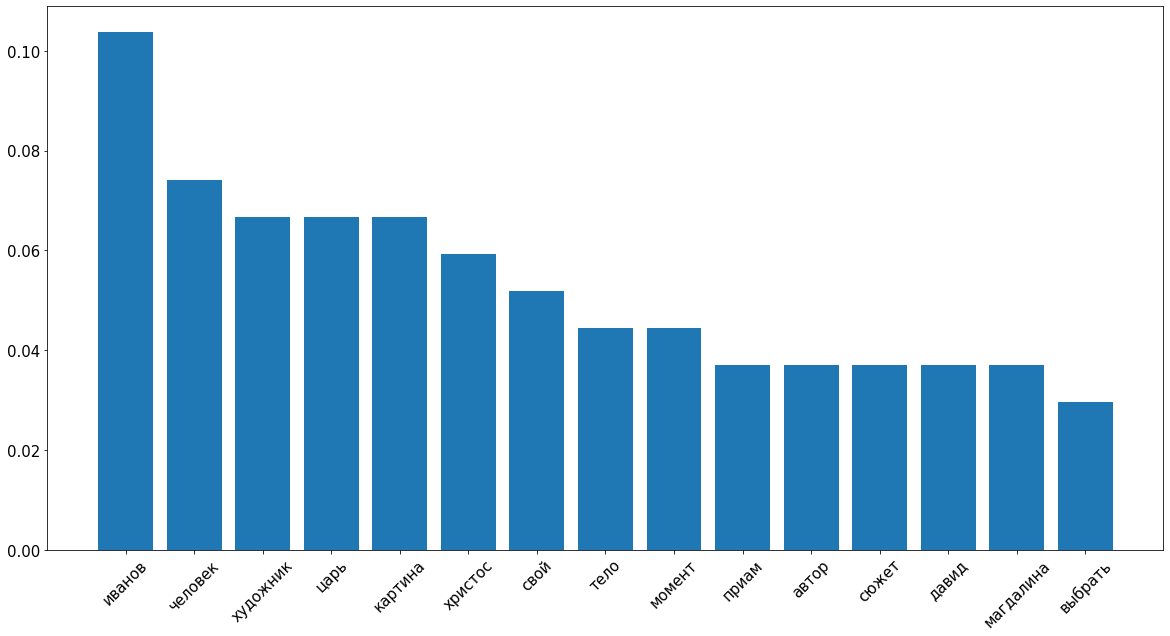

аналитический кубизм


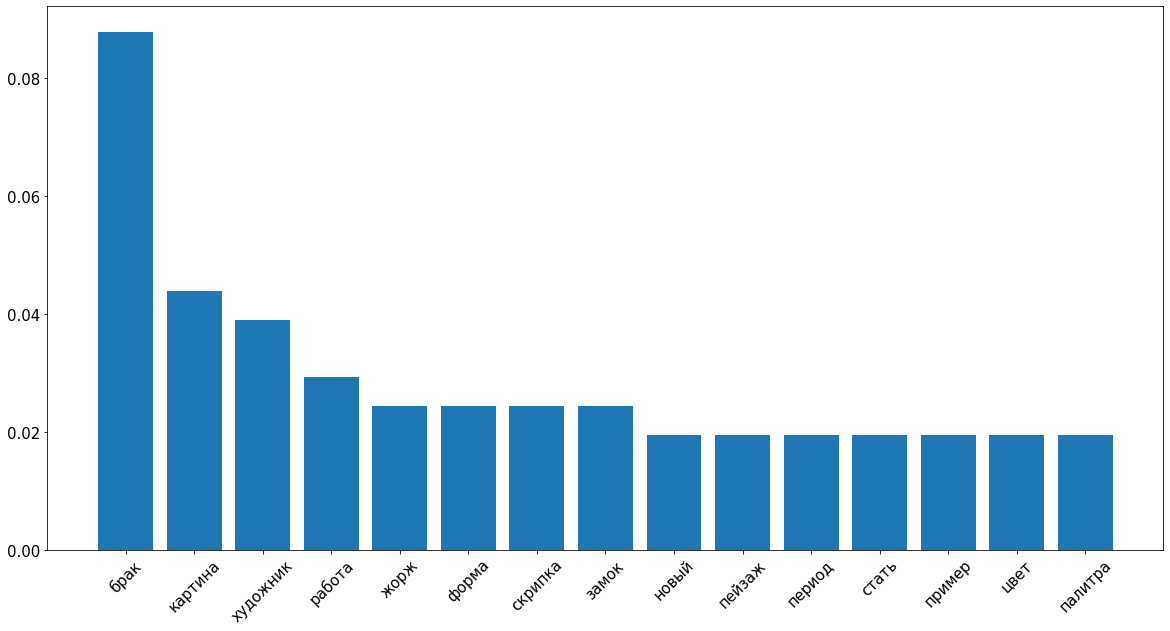

барокко


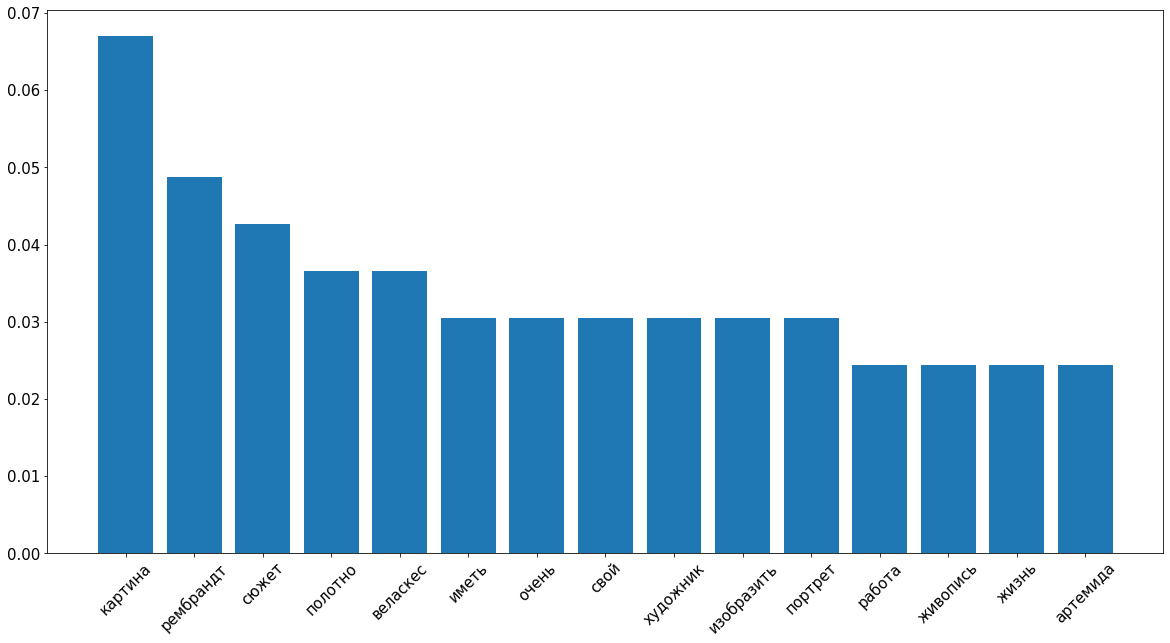

высокое возрождение


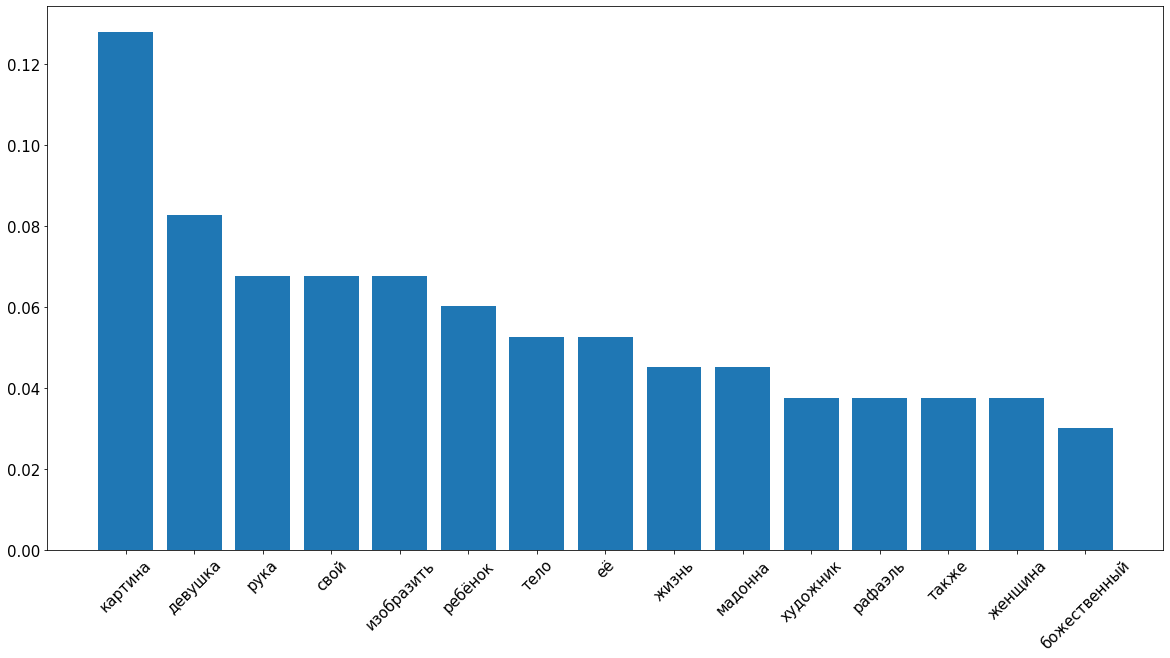

импрессионизм


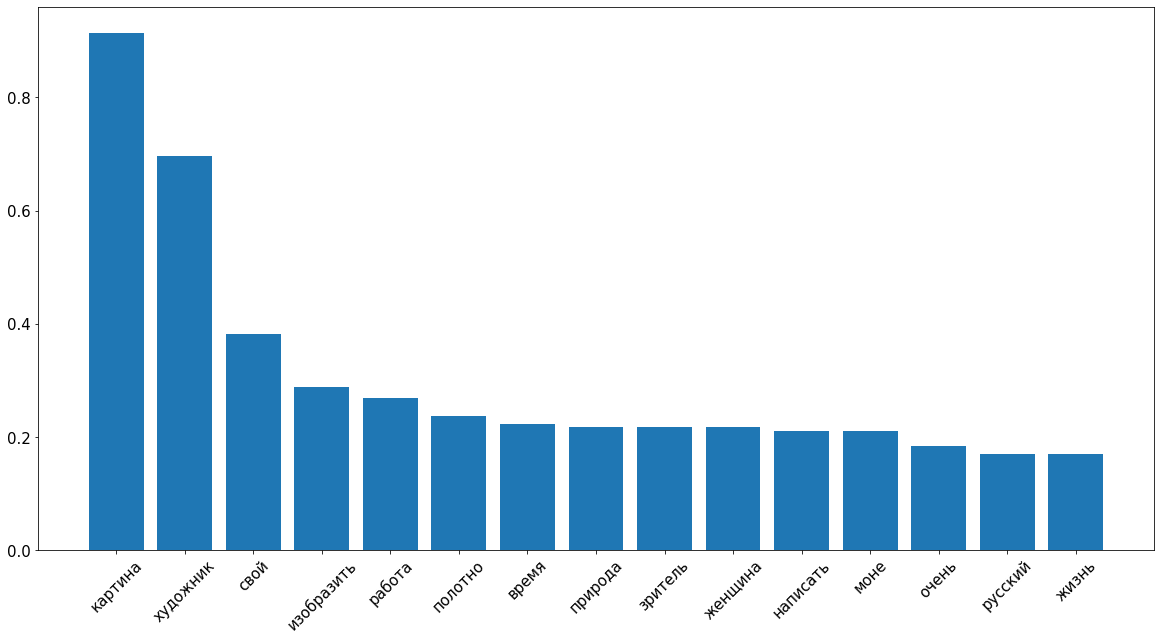

классицизм


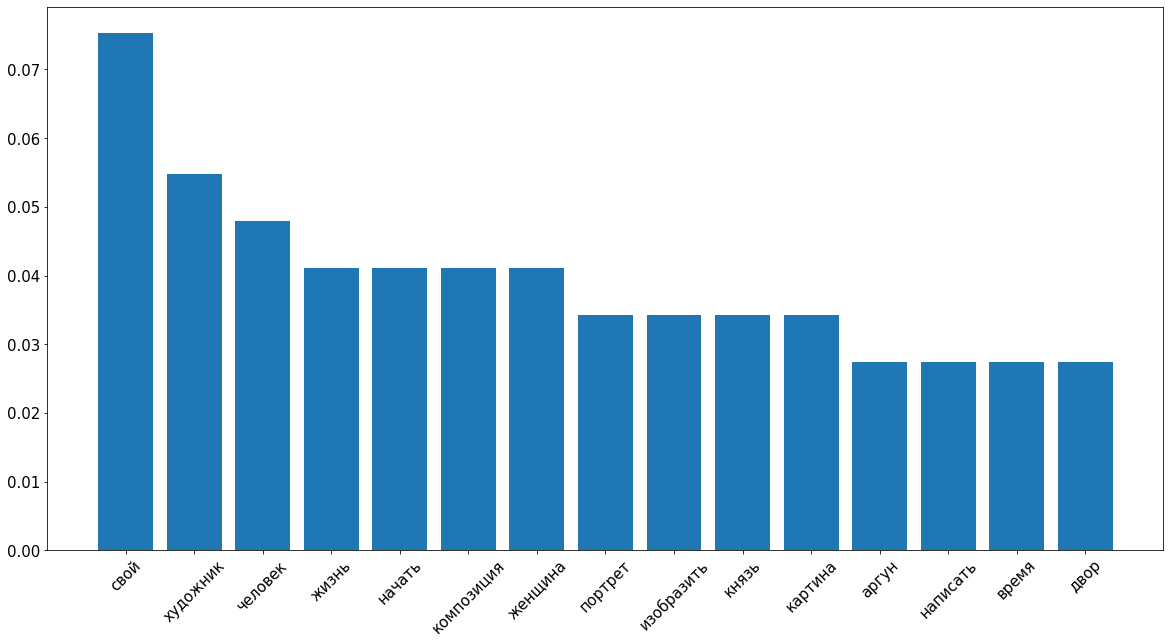

клуазонизм


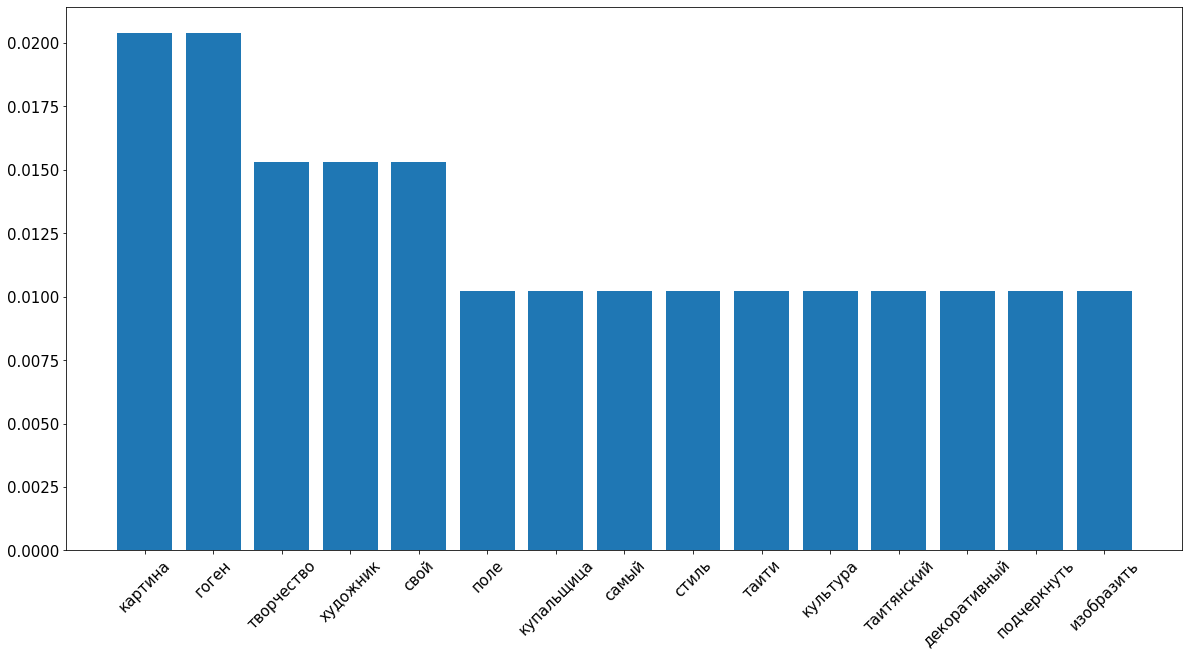

кубизм


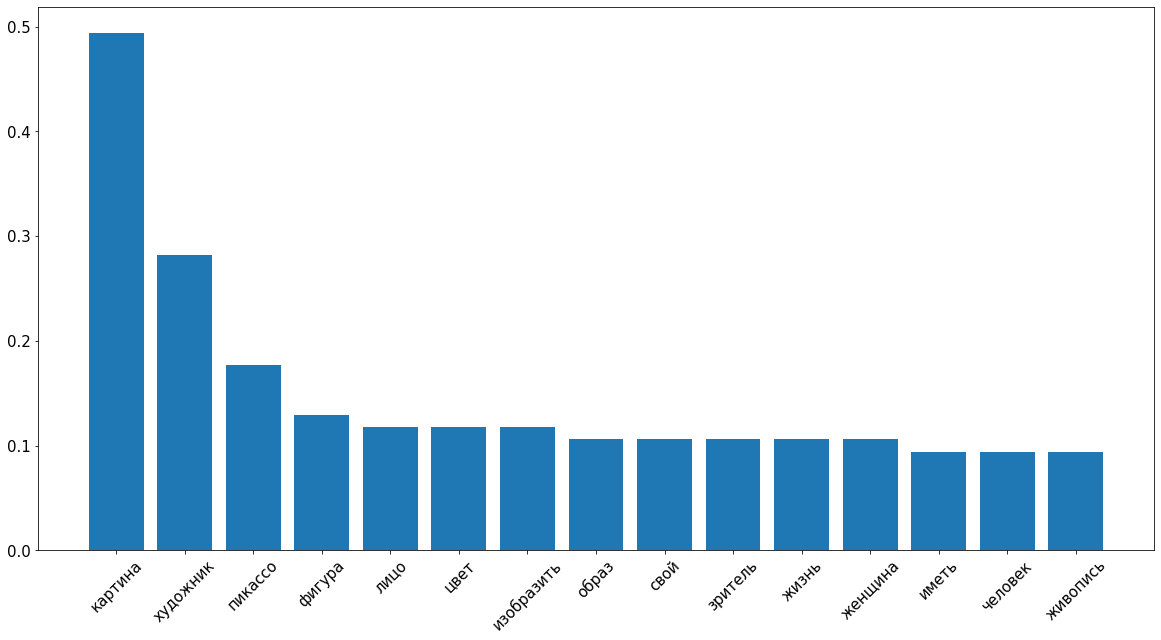

кубизм, постимпрессионизм


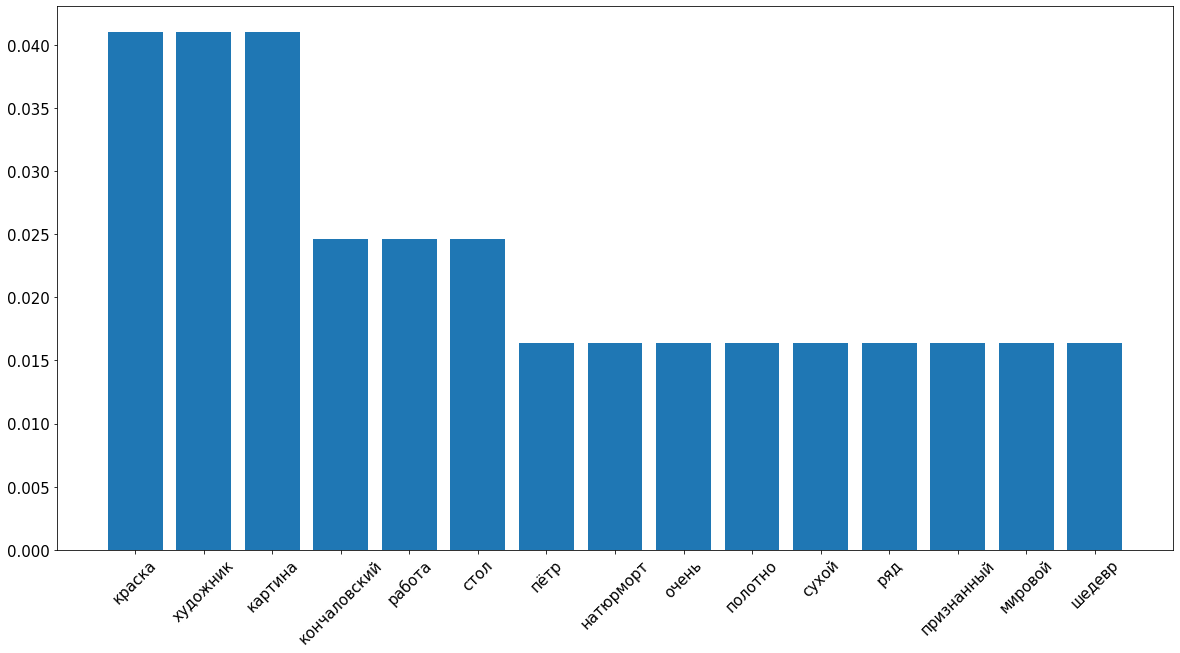

кубизм, экспрессионизм


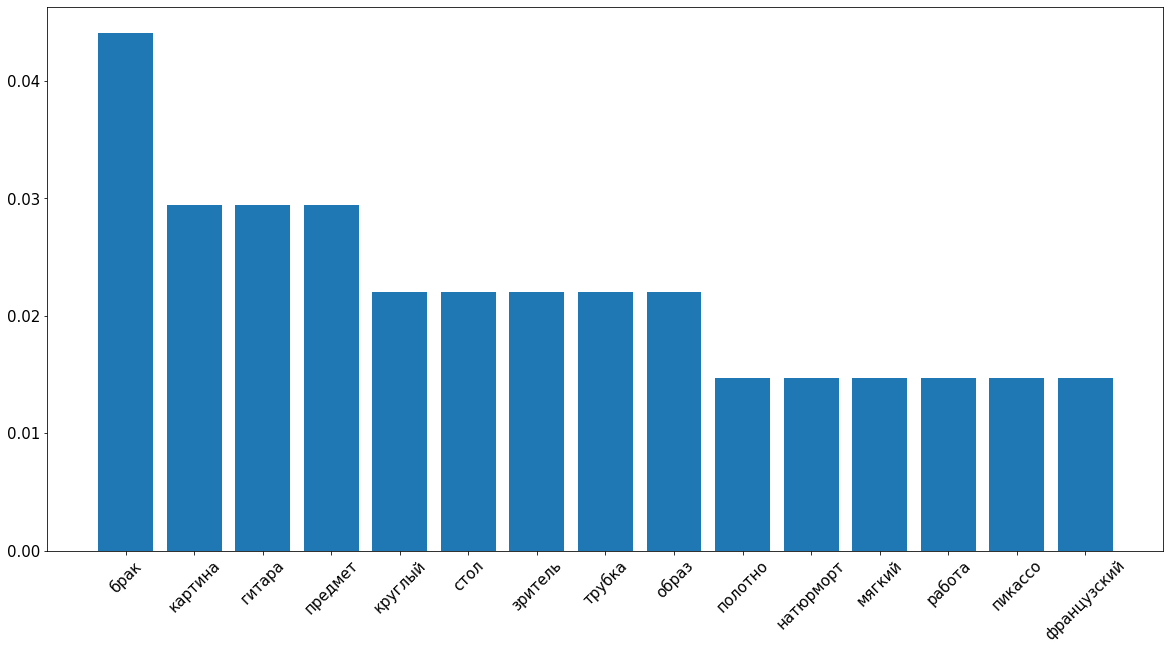

маньеризм, позднее возрождение


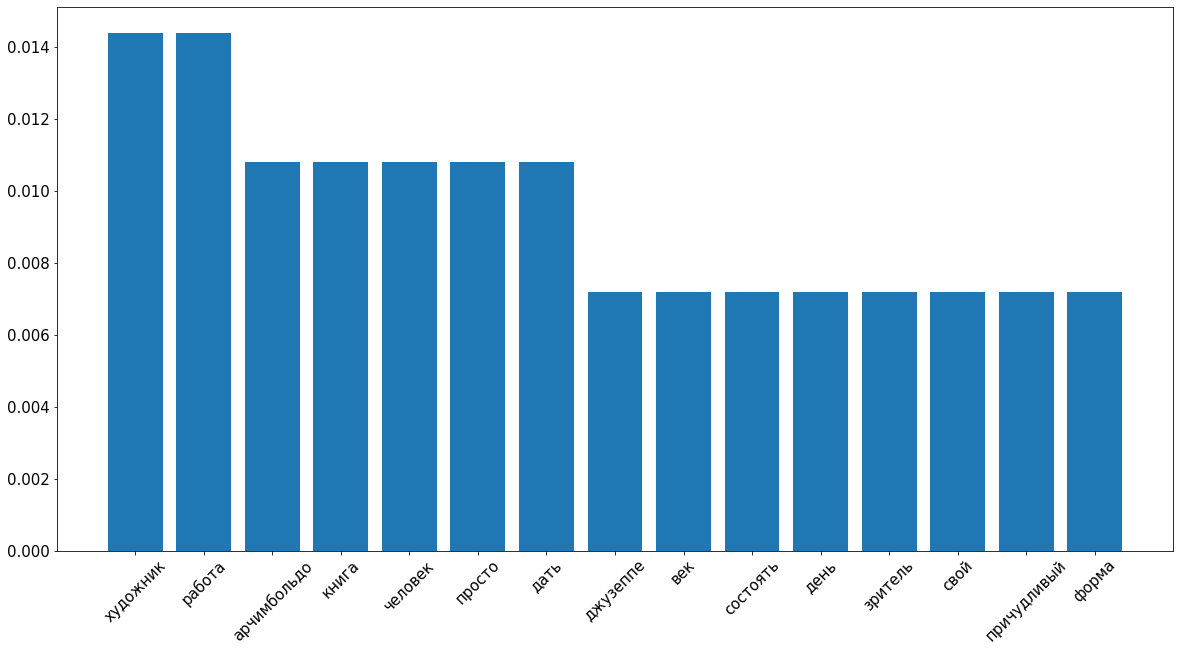

модерн


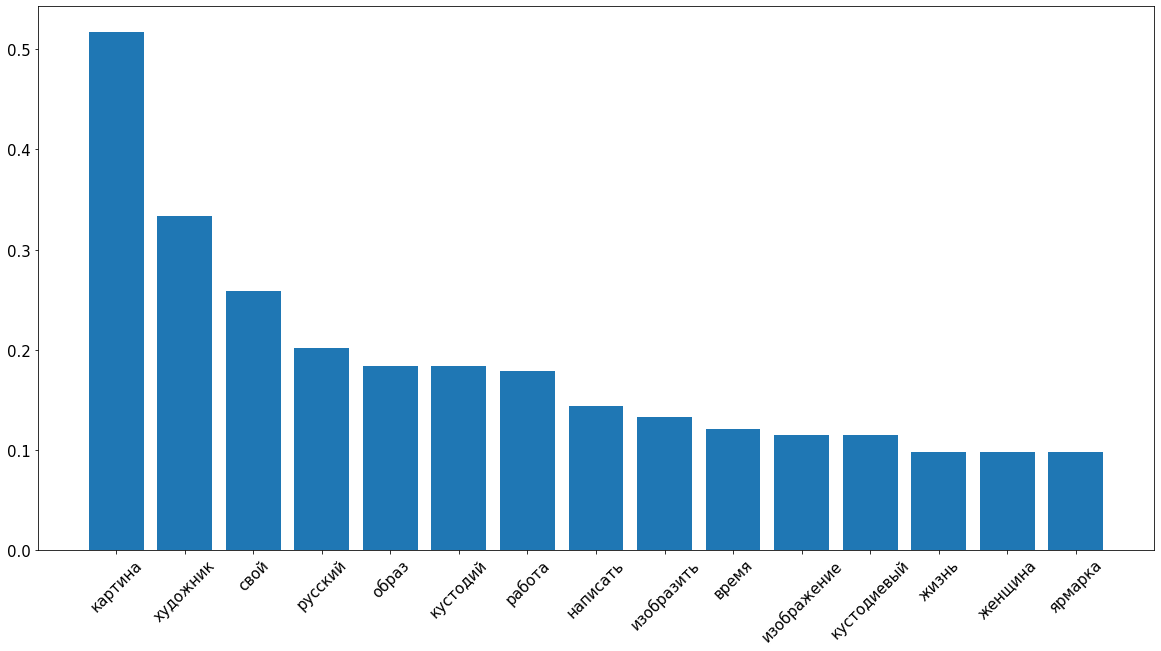

натюрморт


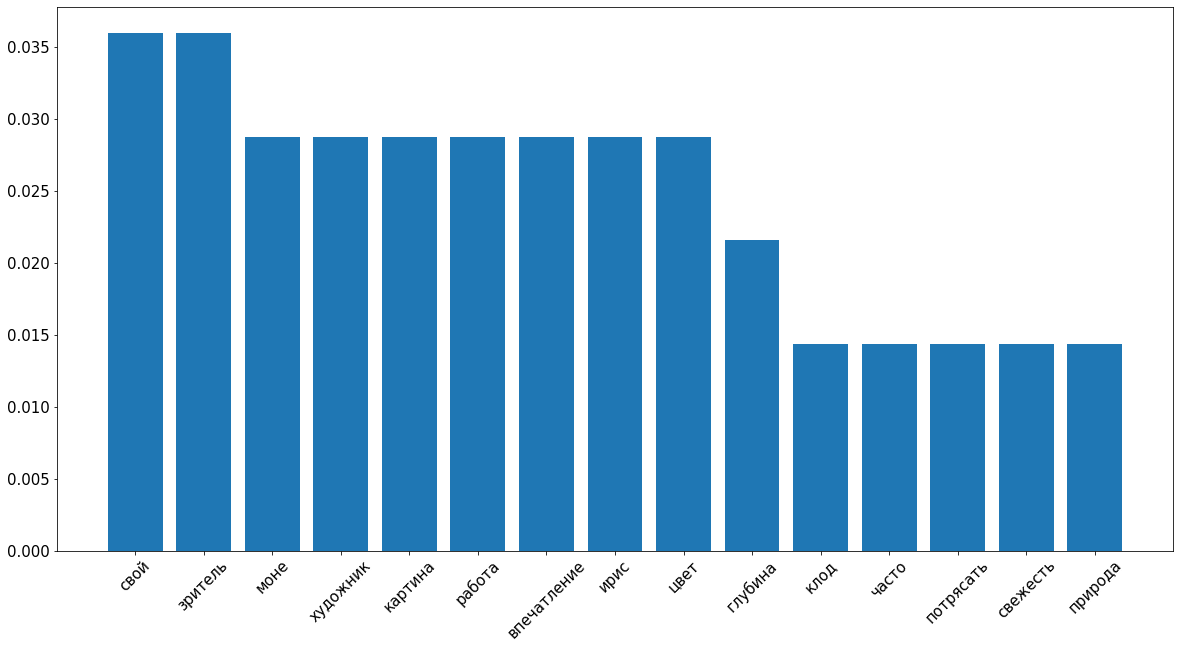

неоклассицизм


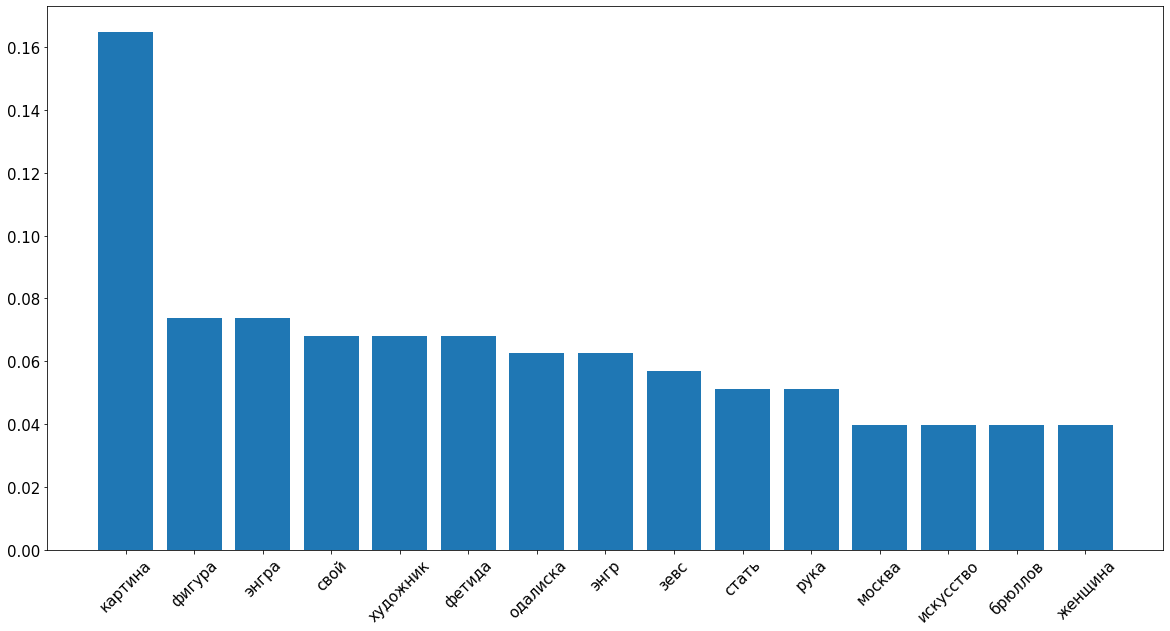

неоэкспрессионизм


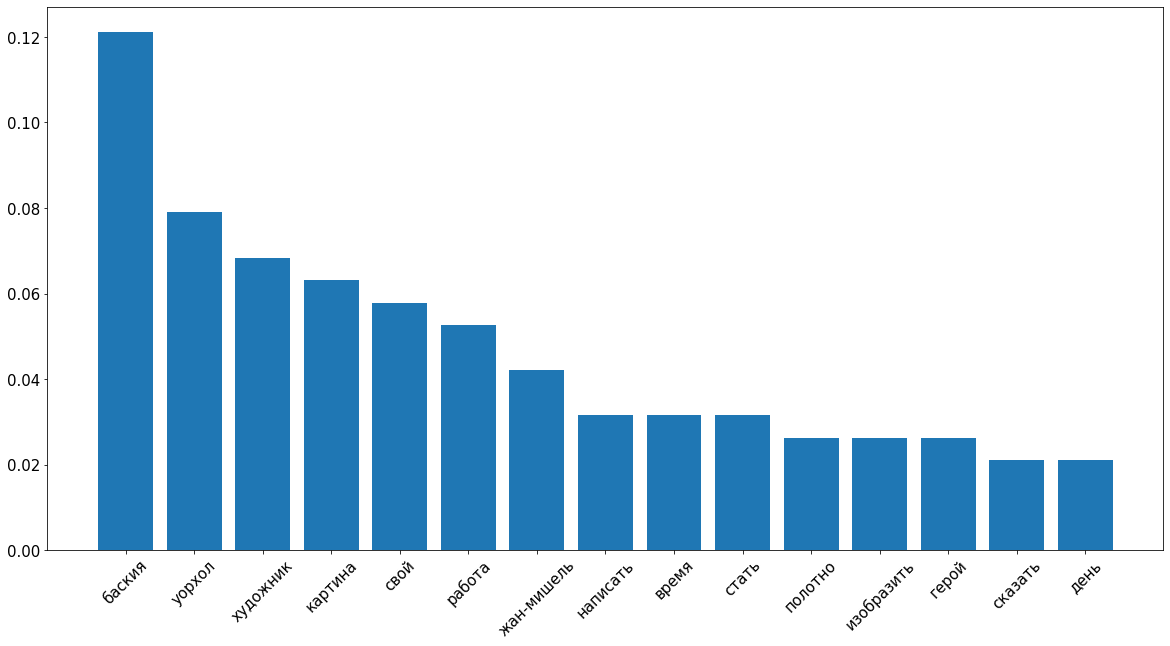

постимпрессионизм


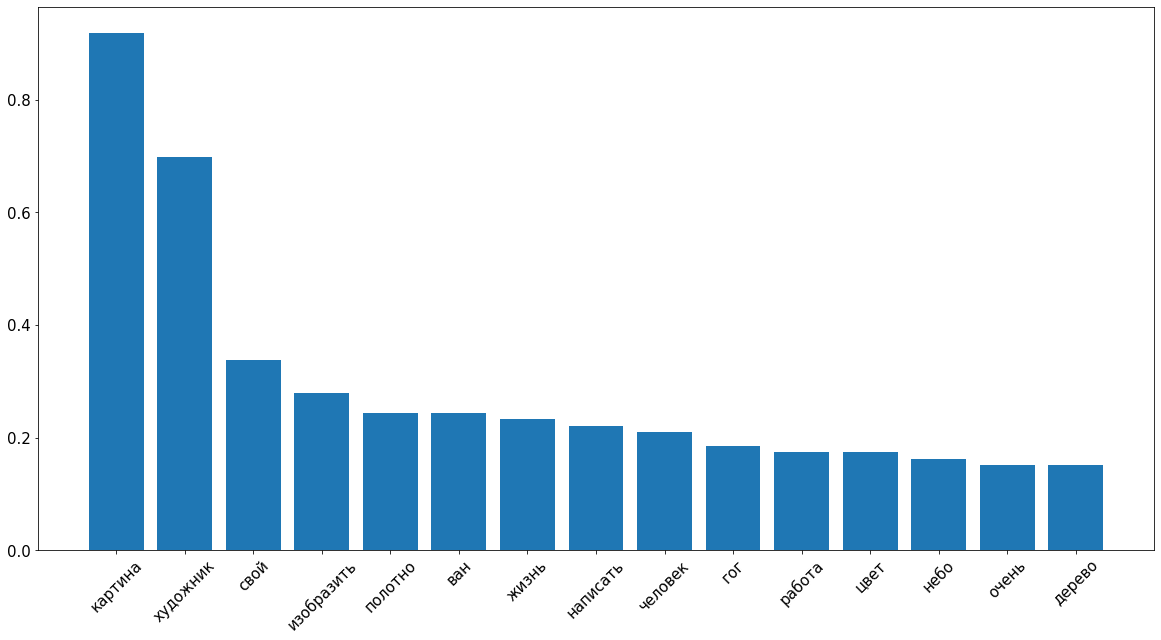

прецизионизм


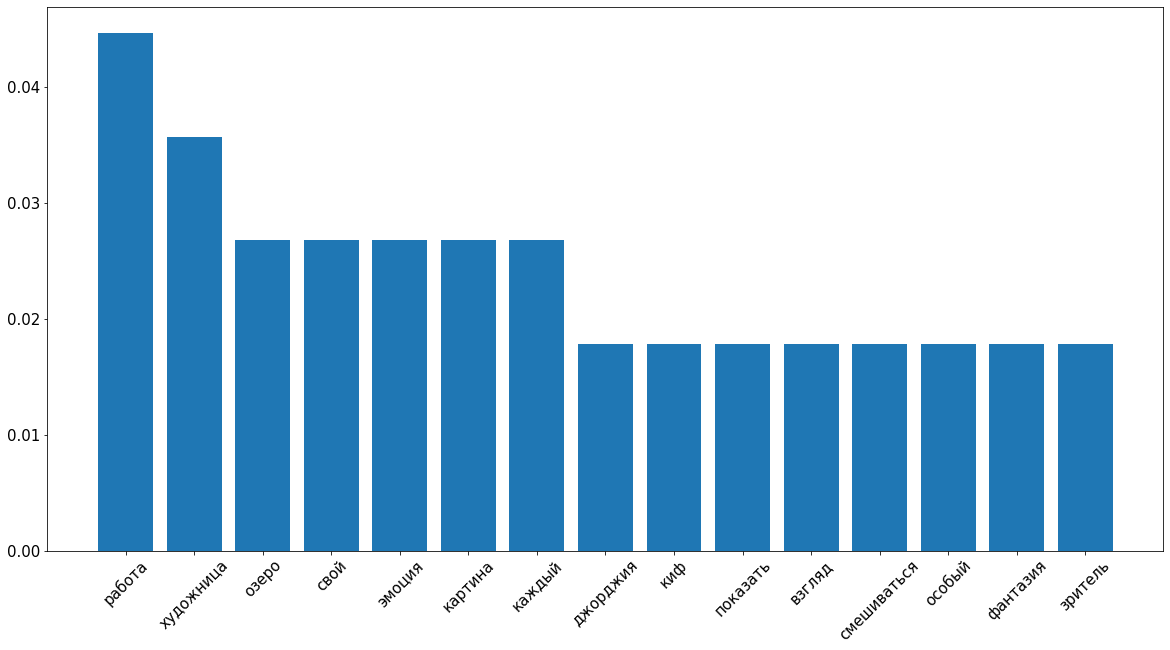

примитивизм


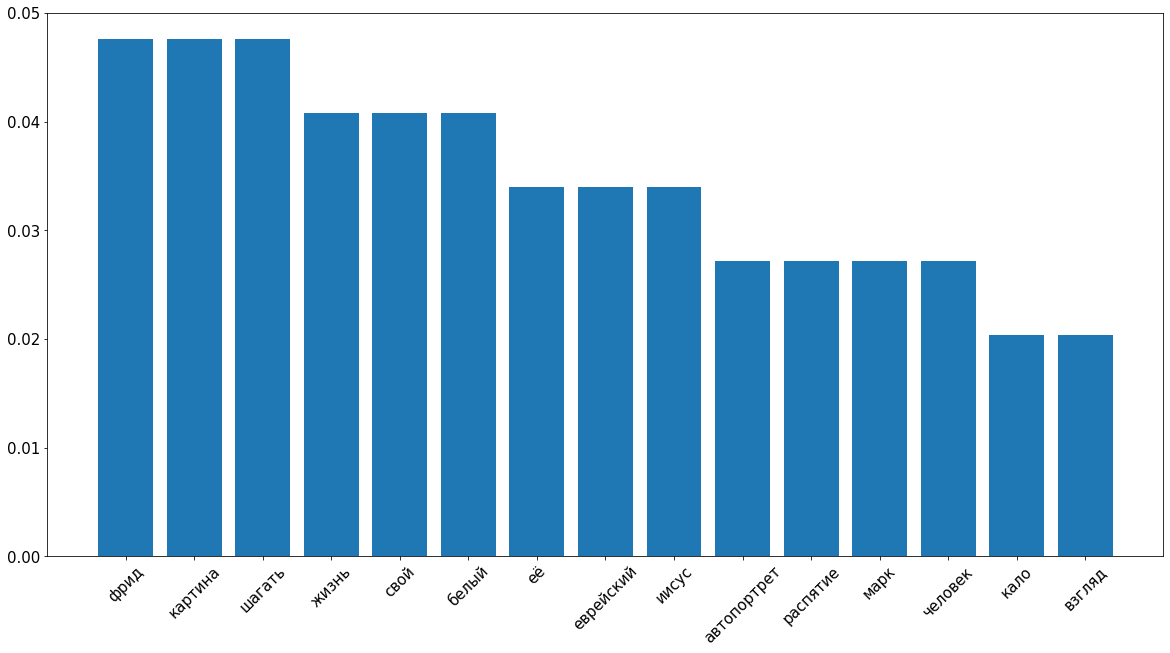

пуантилизм


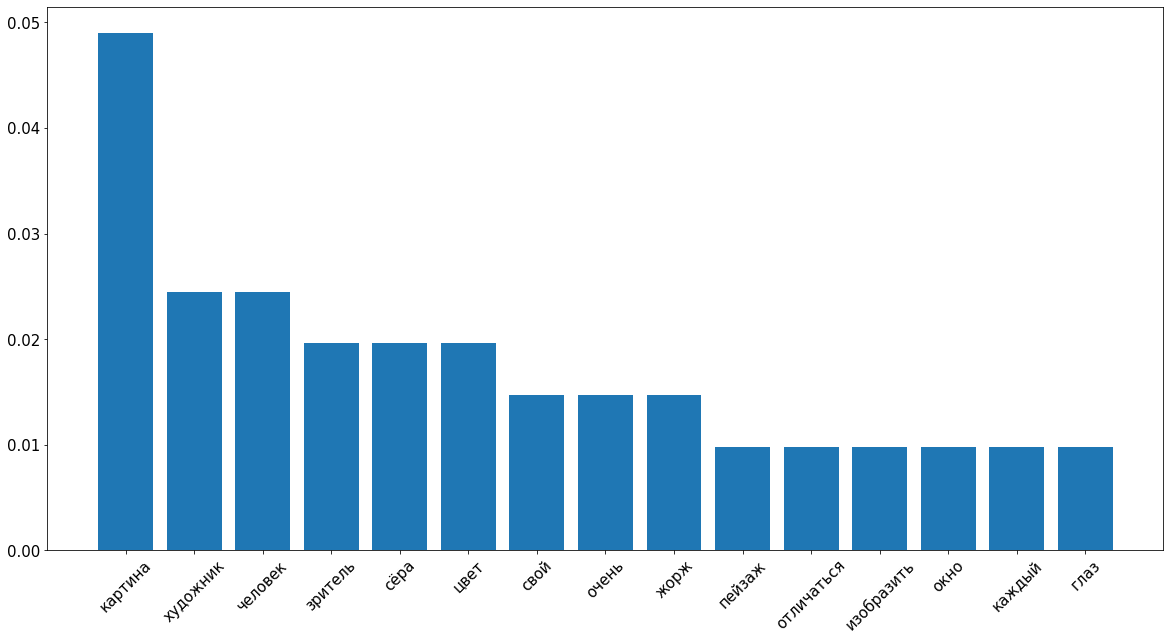

раннее возрождение


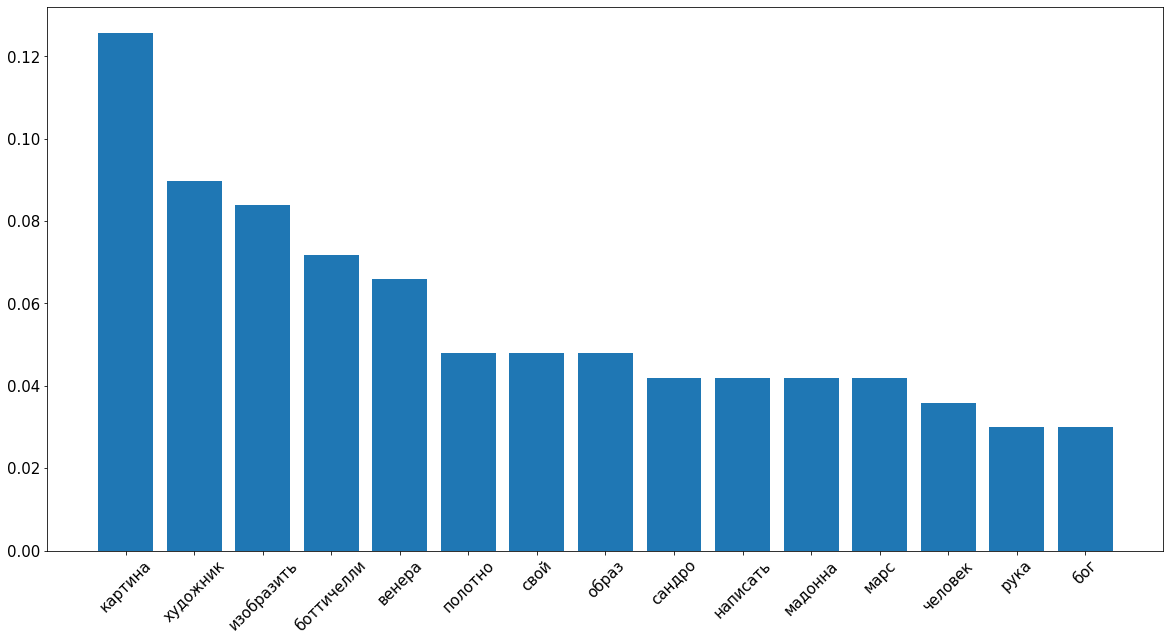

реализм


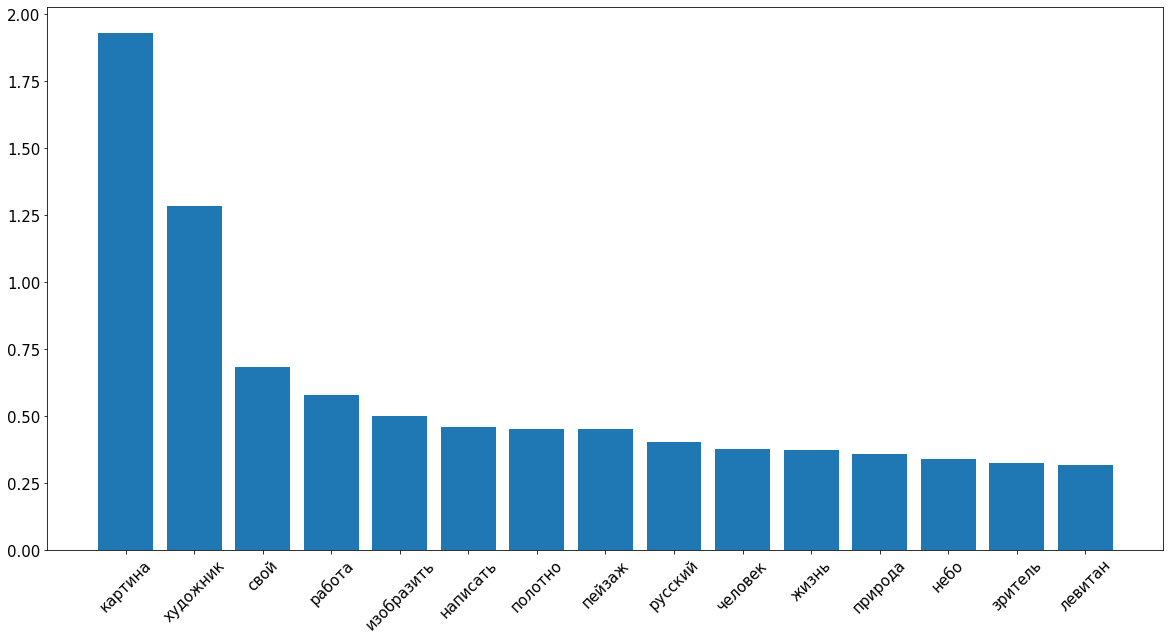

реализм, сюрреализм


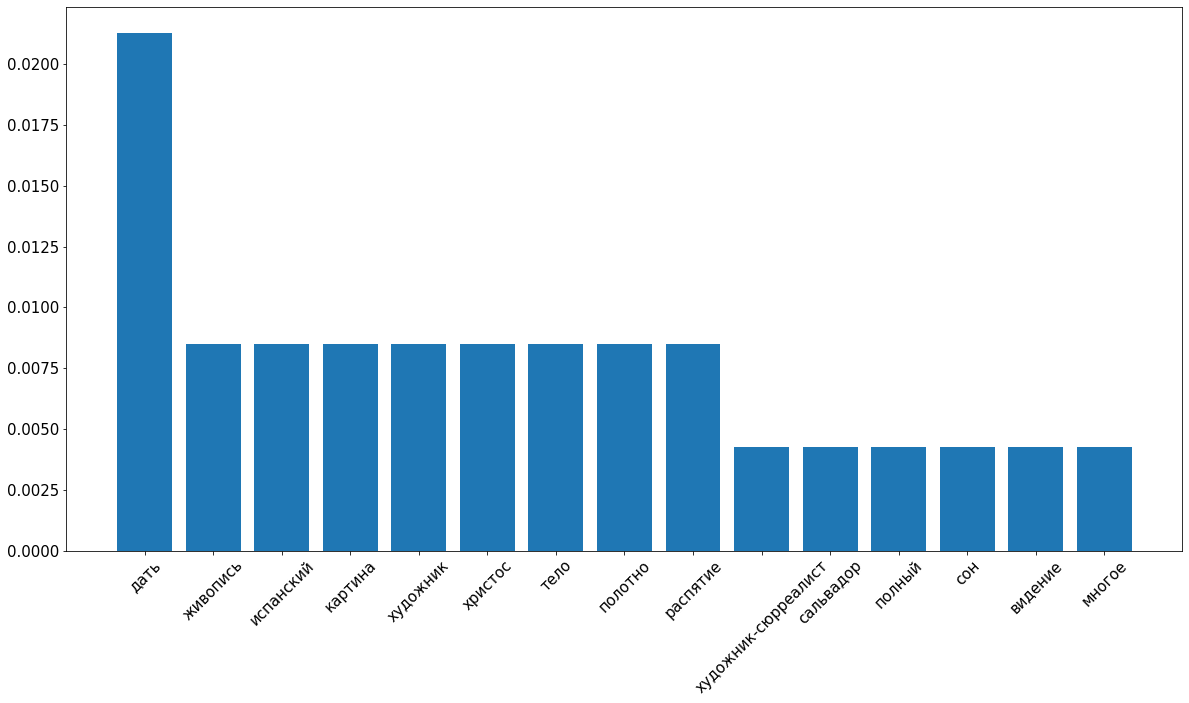

рококо


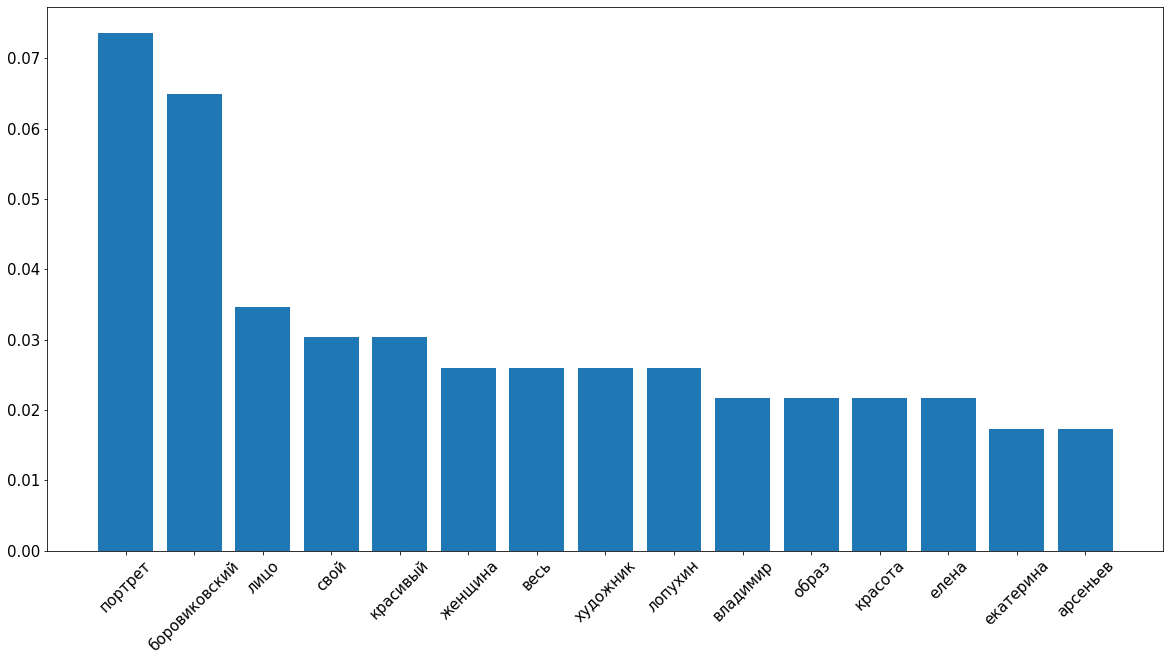

романтизм


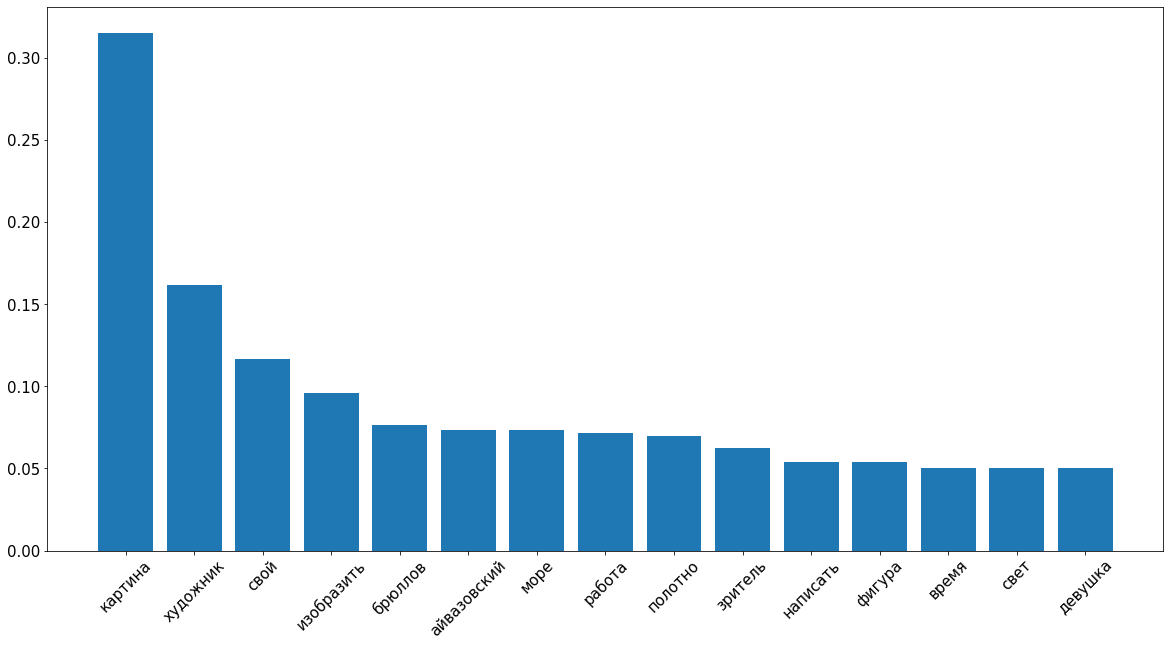

романтизм, символизм


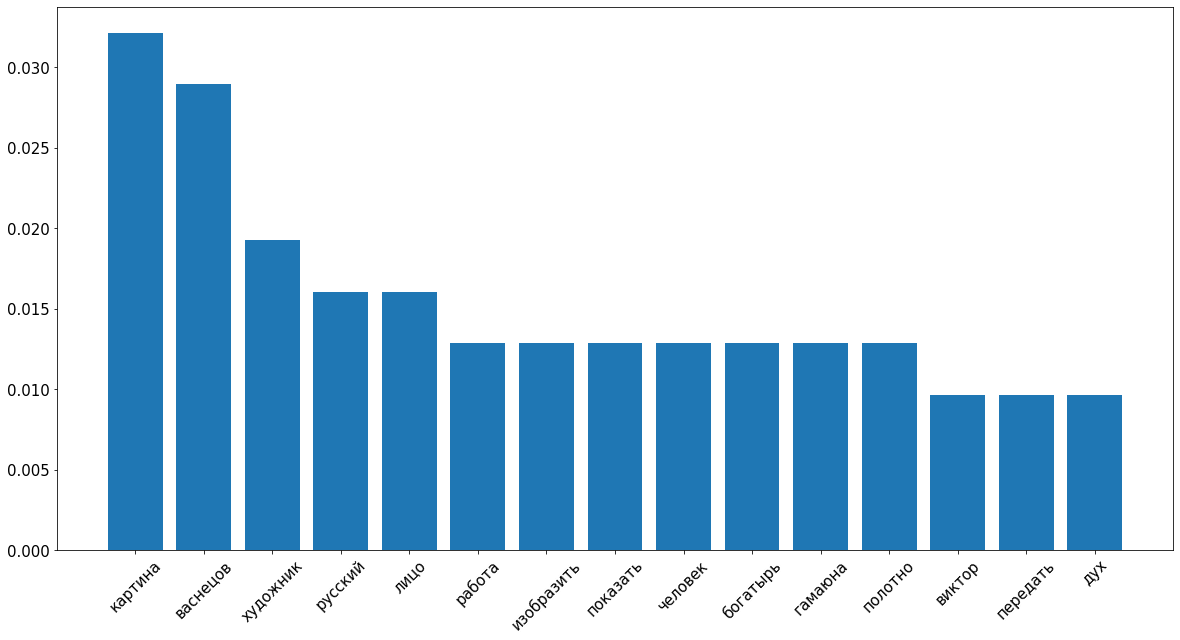

северное возрождение


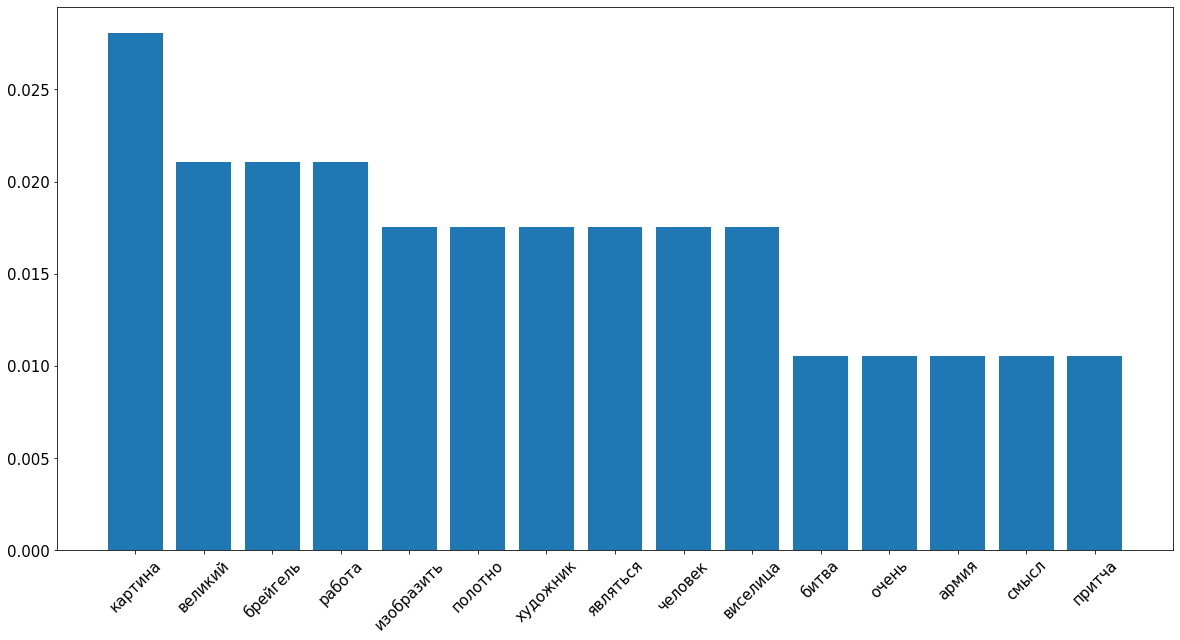

символизм


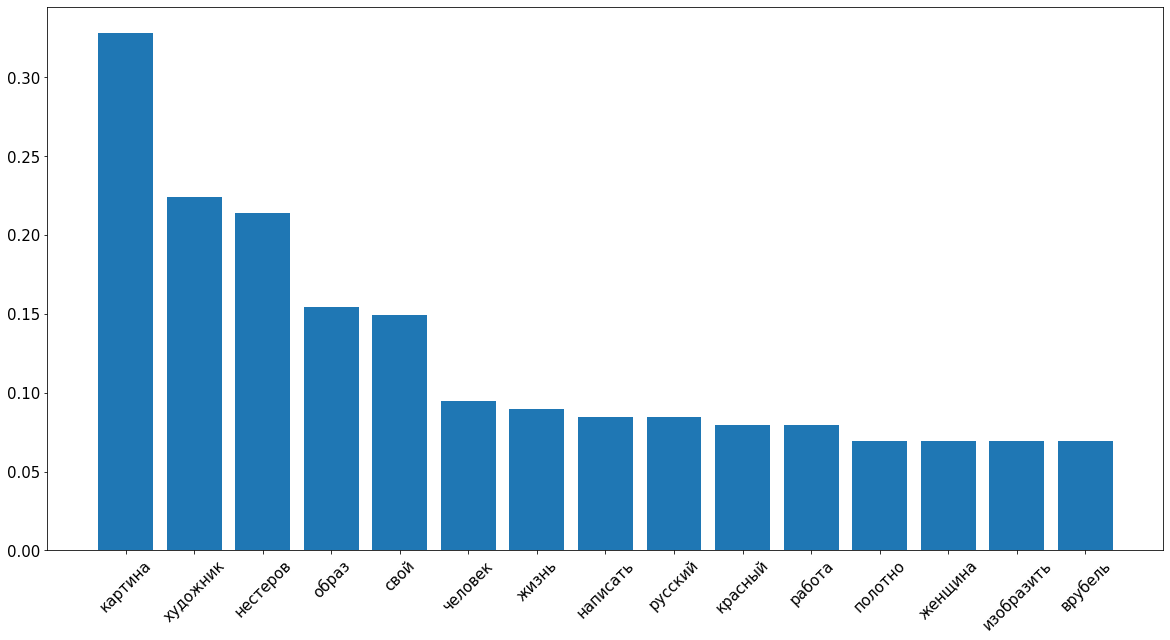

соцреализм


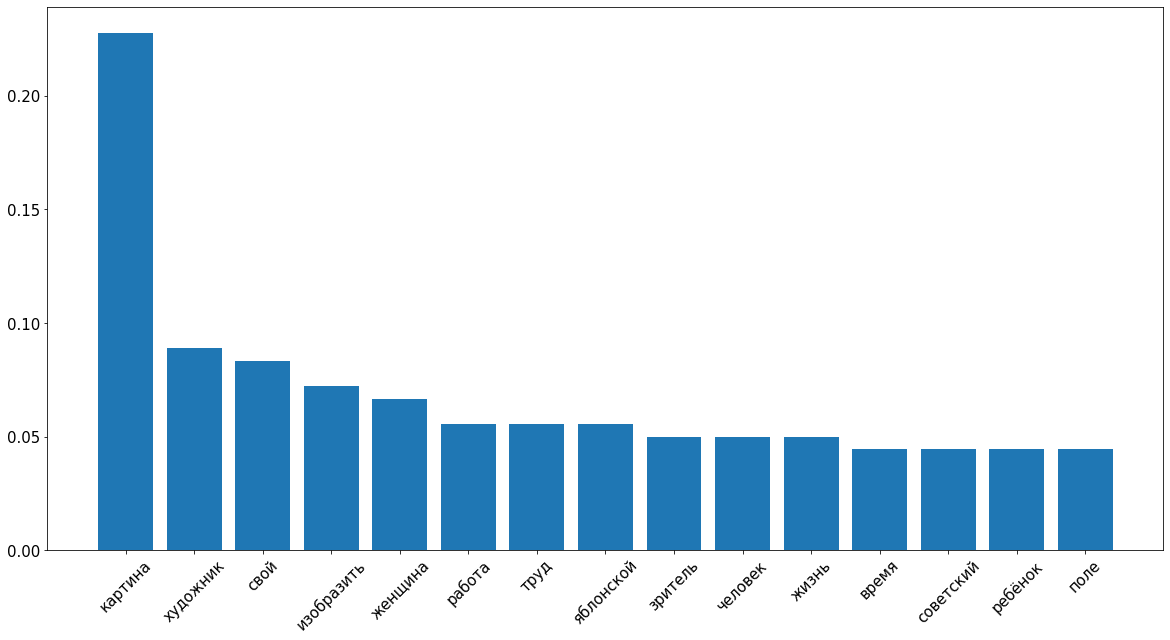

супрематизм


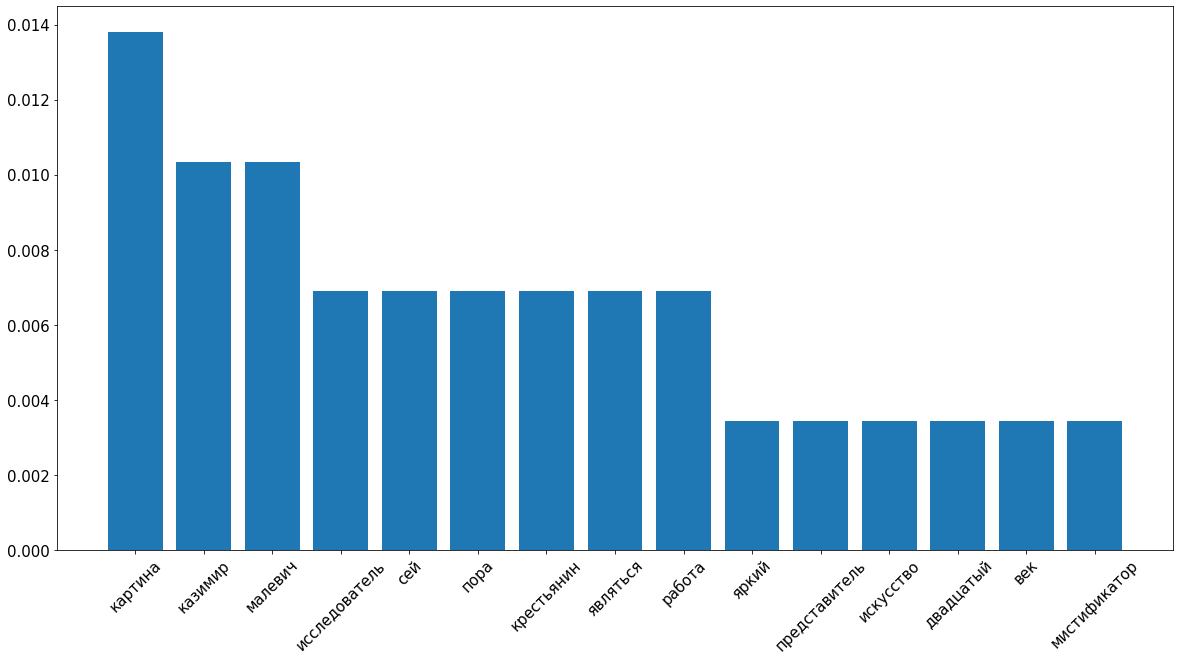

сюрреализм


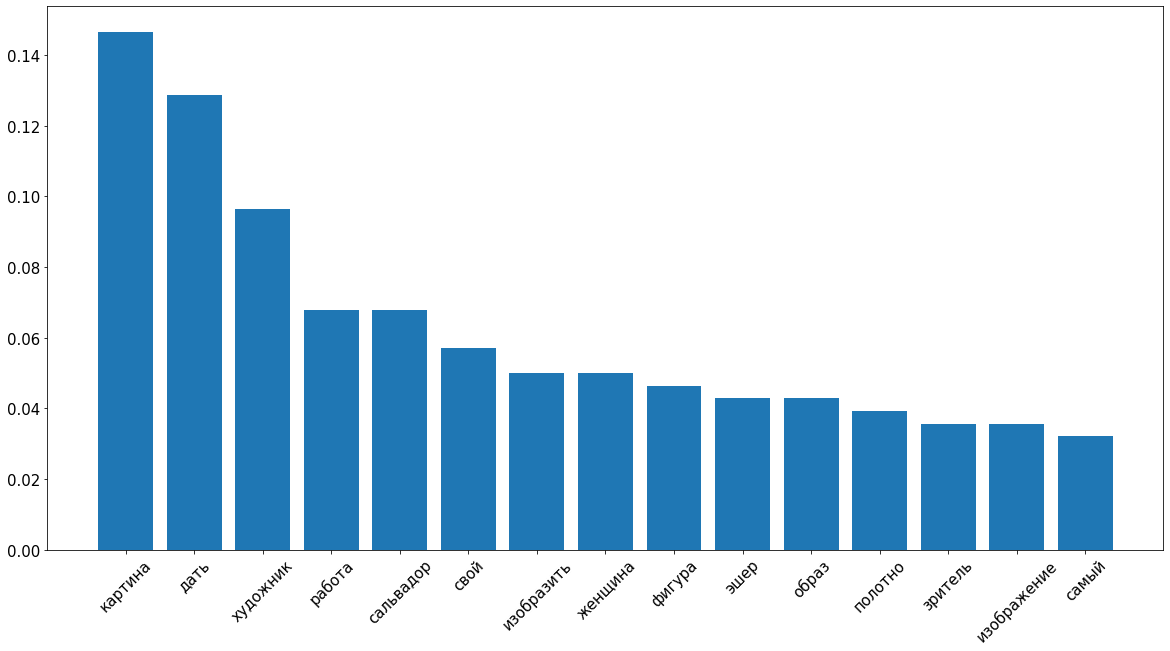

сюрреализм, символизм


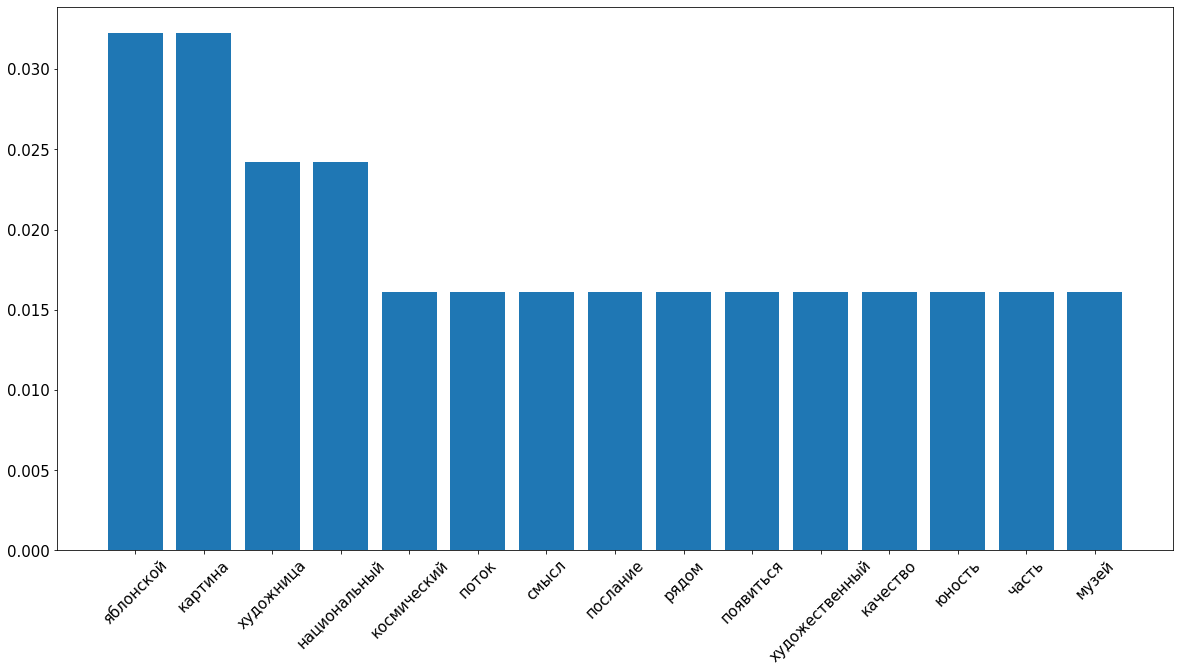

фовизм


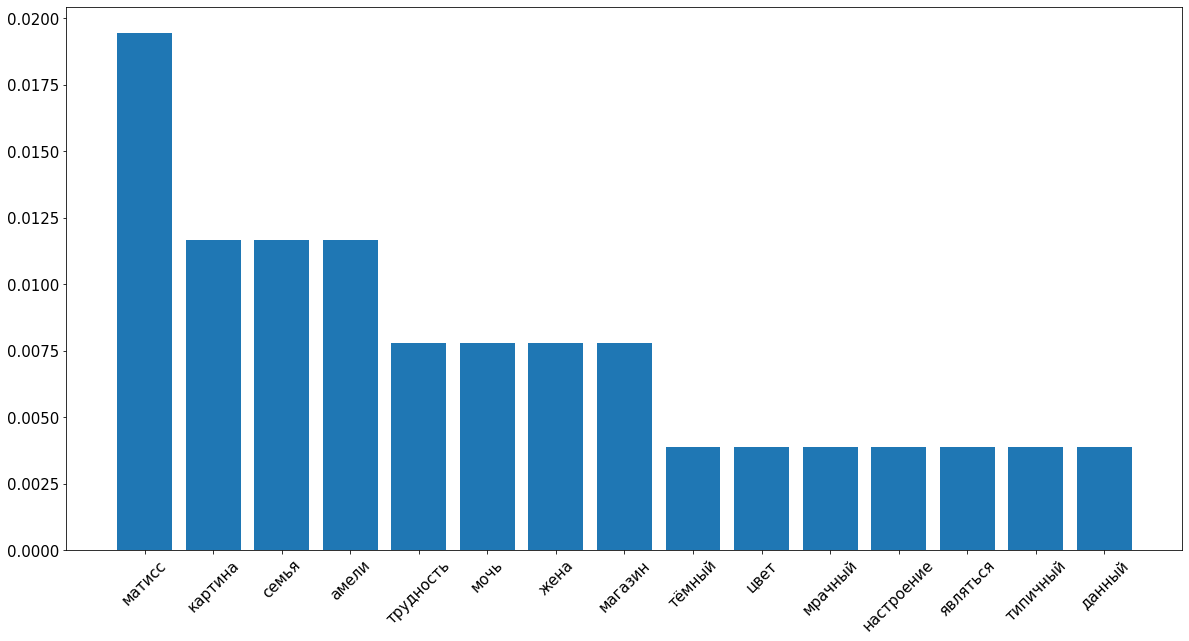

фовизм, экспрессионизм


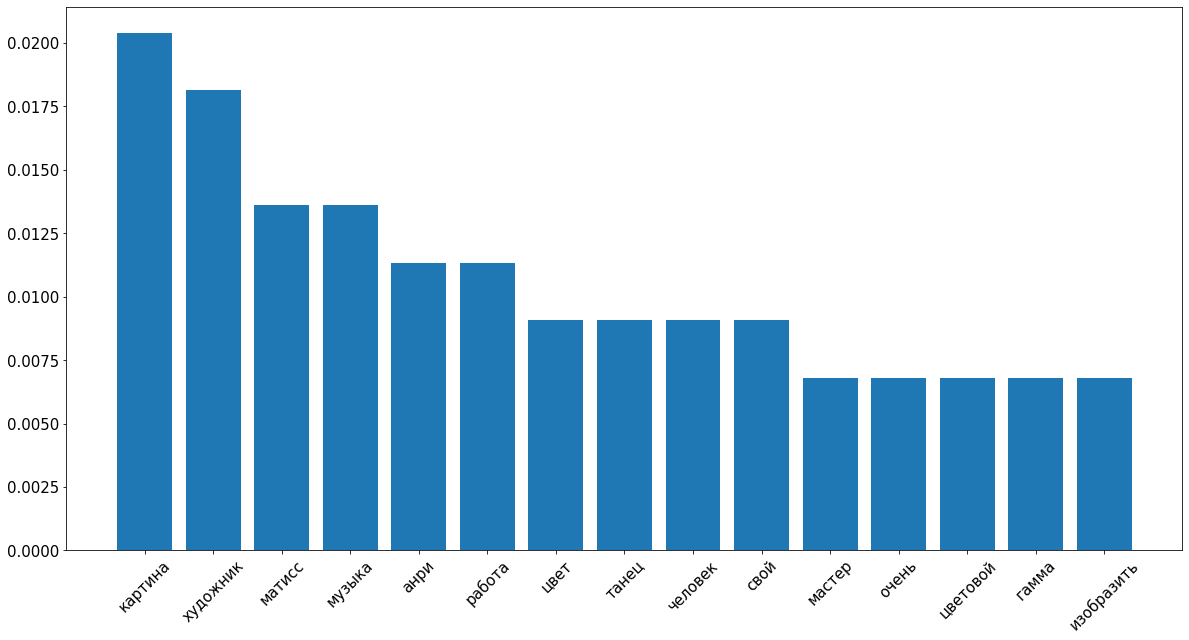

экспрессионизм


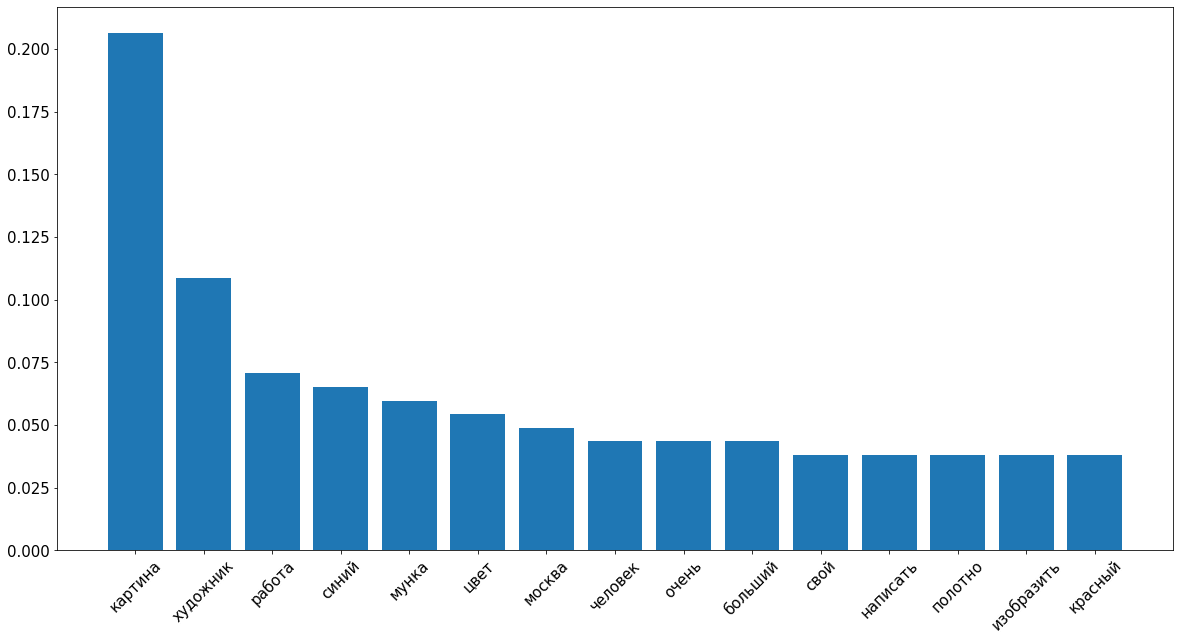

экспрессионизм, символизм


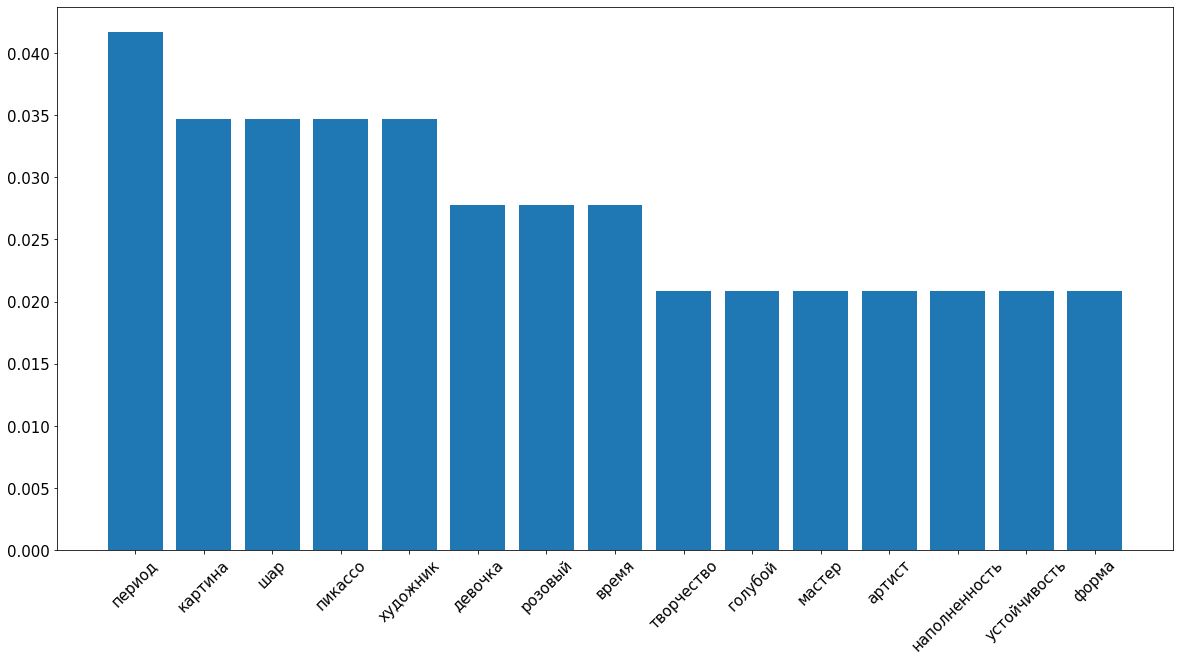

японизм


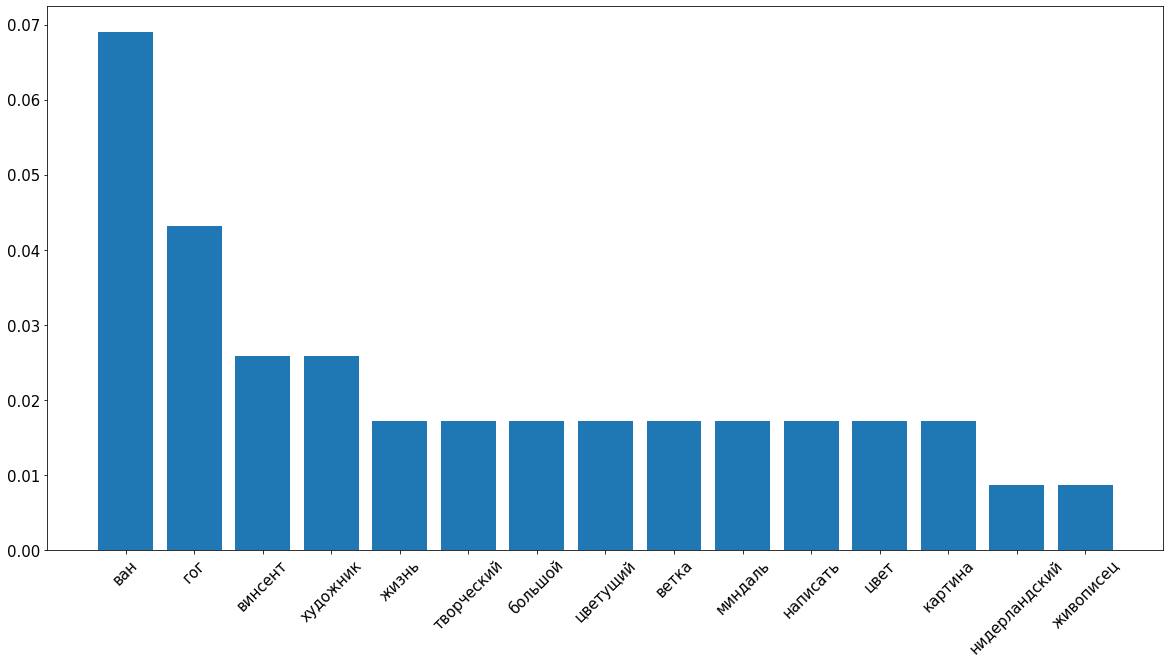

In [93]:
values = []
labels = []
names = []
for i in range(len(df2['Keywords'])):
    word_freq_list = final_countdown(df2['Keywords'].iloc[i])
    
    values.append([pair[1]/preprocess_text(df['Text'].iloc[i], 'count') for pair in word_freq_list]) 
    labels.append([pair[0] for pair in word_freq_list])
    names.append(df2['Style'].iloc[i])
    print(names[i])
    plt.figure(figsize=(20, 10))
    plt.xticks(rotation=45, size = 15)
    plt.yticks(size = 15)
    plt.bar(labels[i], values[i]) 
    plt.show()
    plt.close('all')

